In [1]:
#Get all packages needed
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

I will use cleaned Customer Demographic csv file created during Task 1.

In [2]:
df=pd.read_csv('cleaned_CustomerDemographic.csv')
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,Dearle,Male,33,1961-10-03,Senior Editor,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,N,Yes,8.0


Let's find age of each customer from DOB and create column from them. Then make age groups for future use.

In [3]:
from datetime import datetime
from datetime import date

In [4]:
df["DOB"] = pd.to_datetime(df["DOB"])

df["age"] = df["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))
df["age"].head()

0    68
1    41
2    67
3    60
4    44
Name: age, dtype: int64

In [5]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,68
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,41
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,67
3,4,Talbot,Dearle,Male,33,1961-10-03,Senior Editor,IT,Mass Customer,N,No,7.0,60
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,N,Yes,8.0,44


In [6]:
df.sort_values("age", ascending=False)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,178
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,90
1091,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5.0,86
3409,3410,Merrili,Brittin,Female,93,1940-09-22,Physical Therapy Assistant,Property,Mass Customer,N,No,16.0,81
2412,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2296,Nathalia,Sanger,Female,16,2002-01-01,Geologist IV,Retail,Affluent Customer,N,No,1.0,19
3434,3435,Stevena,Allcock,Female,80,2002-01-15,Senior Editor,Health,Affluent Customer,N,No,1.0,19
65,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,No,1.0,19
1887,1888,Sibyl,Scholtz,Female,67,2002-01-26,Food Chemist,Health,Mass Customer,N,Yes,1.0,19


While cleaning data set I forgot to fix it. Age 178 is not realistic, and need to fix. Lets drop this row.

In [7]:
df.drop(33, inplace=True)

In [8]:
df['age'].max()

90

In [9]:
df['age'].min()

19

In [10]:
bins= [0,15,25,65,90]
labels = ['Teen','Youth','Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,AgeGroup
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,68,Senior
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,41,Adult
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,67,Senior
3,4,Talbot,Dearle,Male,33,1961-10-03,Senior Editor,IT,Mass Customer,N,No,7.0,60,Adult
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,N,Yes,8.0,44,Adult


In [11]:
df['AgeGroup'].value_counts()

Adult     3488
Youth      299
Senior     211
Teen         0
Name: AgeGroup, dtype: int64

Text(0, 0.5, 'Number of Customers')

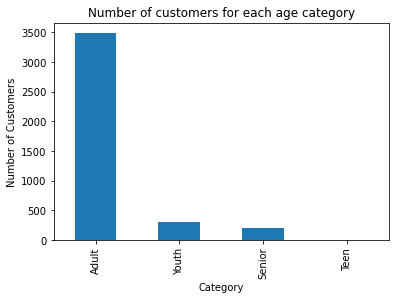

In [12]:
df['AgeGroup'].value_counts().plot(kind="bar")
plt.title("Number of customers for each age category")
plt.xlabel("Category")
plt.ylabel("Number of Customers")

In [13]:
df['job_title'].value_counts().head(10)

Social Worker                           52
Tax Accountant                          51
Business Systems Development Analyst    50
Internal Auditor                        50
Dental Hygienist                        47
Associate Professor                     46
Structural Engineer                     45
General Manager                         45
Chemical Engineer                       44
Recruiting Manager                      44
Name: job_title, dtype: int64

In [14]:
df['job_industry_category'].value_counts()

Manufacturing         959
Financial Services    926
Health                720
Retail                433
Property              320
IT                    272
Entertainment         158
Argiculture           129
Telecommunications     82
Name: job_industry_category, dtype: int64

Text(0, 0.5, 'Number of Customers')

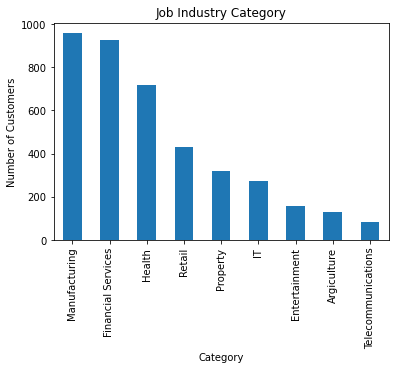

In [15]:
df['job_industry_category'].value_counts().plot(kind="bar")
plt.title("Job Industry Category")
plt.xlabel("Category")
plt.ylabel("Number of Customers")


In [16]:
df['owns_car'].value_counts()

Yes    2024
No     1975
Name: owns_car, dtype: int64

Text(0, 0.5, 'Number of Customers')

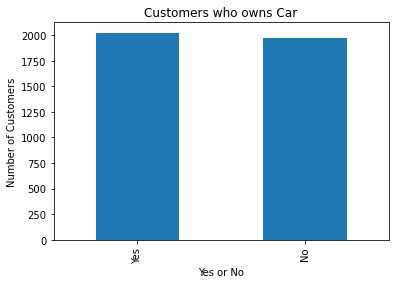

In [17]:
df['owns_car'].value_counts().plot(kind="bar")
plt.title("Customers who owns Car")
plt.xlabel("Yes or No")
plt.ylabel("Number of Customers")

In [18]:
df['gender'].value_counts()

Female    2037
Male      1872
U           87
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [19]:
#Let's find index of F, Femal, M and drop them for cool visualization
print(df[df['gender']=='F'].index.values)
print(df[df['gender']=='Femal'].index.values)
print(df[df['gender']=='M'].index.values)


[0]
[53]
[56]


In [20]:
df.drop([0,53,56], inplace=True)

In [21]:
df['gender'].value_counts()

Female    2037
Male      1872
U           87
Name: gender, dtype: int64

Text(0, 0.5, 'Number of Customers')

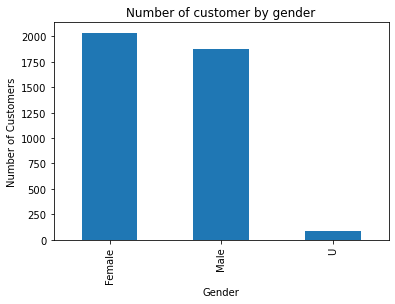

In [22]:
df['gender'].value_counts().plot(kind="bar")
plt.title("Number of customer by gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Sum')

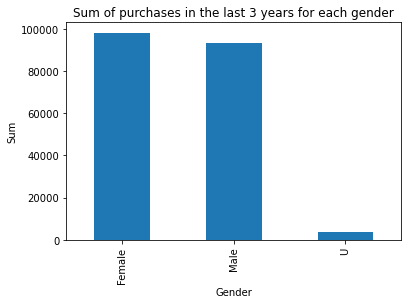

In [23]:
df.groupby(by=["gender"])["past_3_years_bike_related_purchases"].sum().plot(kind="bar")
plt.title("Sum of purchases in the last 3 years for each gender")
plt.xlabel("Gender")
plt.ylabel("Sum")

In [24]:
df['wealth_segment'].value_counts()

Mass Customer        1997
High Net Worth       1021
Affluent Customer     978
Name: wealth_segment, dtype: int64

Text(0, 0.5, 'Number of Customers')

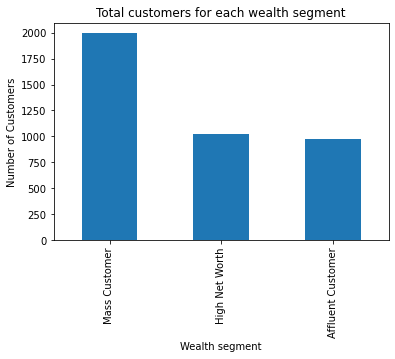

In [25]:
df['wealth_segment'].value_counts().plot(kind="bar")
plt.title("Total customers for each wealth segment")
plt.xlabel("Wealth segment")
plt.ylabel("Number of Customers")